<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

# Lab: Matplotlib

O principal objetivo desse lab é você entender como funciona a construção em camadas do `Matplotlib`, e como empregar os modos `script layer` e `artist layer` para produzir múltiplos gráficos em uma figura.

<br>

<img src="https://github.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/raw/main/figuras/capas/1.png" width="20%"/>

Oliveira, R. (2022). [Visualizacao de Dados em Python](https://github.com/Rogerio-mack/Visualizacao-de-Dados-em-Python) Cap. 3






# Basic imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Exercício 1 `plt.plot()`, function. (**RESOLVIDO**)

Produza um gráfico de linha da função $tanh(x)$ para $x \in [-10,10]$.

1. Inclua um título com a função
2. Altere a cor e o estilo de linha do gráfico
3. Altere o tamanho da figura
4. Inclua rótulos para os eixos do gráfico

In [3]:
def f(x):
  return np.tanh(x)

x = np.arange(-10.0,10.0,0.05)
y = f(x)

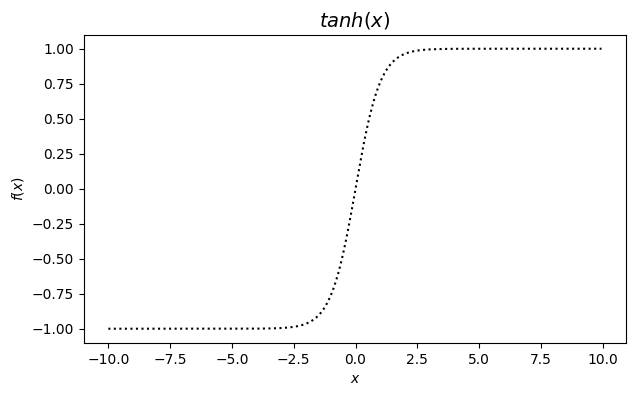

In [4]:
plt.figure(figsize=(7,4))

plt.plot(x, y, color='k', linestyle=':')
# plt.plot(x, y, 'k:')
plt.title('$tanh(x)$',fontsize=14)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()

# Exercício 2 `plt.plot()`, random data. (**RESOLVIDO**)

Produza um gráfico a partir do dataframe abaixo.

1. Inclua um título
2. Altere a cor e o estilo de linha do gráfico
3. Altere o tamanho da figura
4. Inclua rótulos para os eixos do gráfico

In [5]:
df = pd.DataFrame()
df['x-values'] = np.arange(0,10,0.01)
df['y-values'] = np.random.sample(len(df))
df.head()


,x-values,y-values
0,0.00,0.014422
1,0.01,0.579104
2,0.02,0.966187
3,0.03,0.911182
4,0.04,0.780054


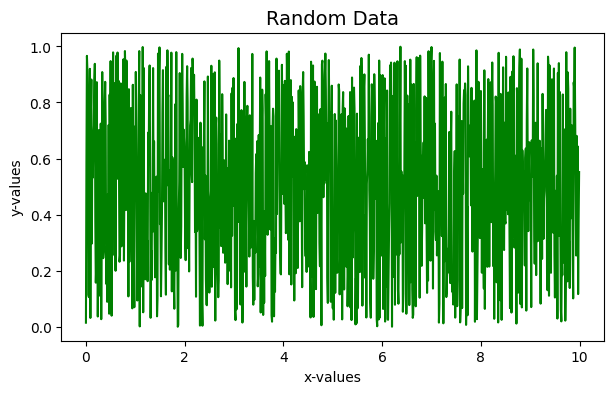

In [6]:
plt.figure(figsize=(7,4))

plt.plot('x-values', 'y-values', data=df, color='g', linestyle='-')
# plt.plot(df['x-values'], df['y-values'], color='g', linestyle='-')
plt.title('Random Data',fontsize=14)
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.show()

# **CASE: fmri**

Nos exercícios a seguir partimos da seguinte base de dados:

In [7]:
df = sns.load_dataset('fmri')
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


# Pré Exercício!

Explore a base antes de prosseguir. **Ordene os dados no tempo** antes de seguir.

Dica: `df.sort_values()`

In [11]:
# Seu código

df.sort_values('timepoint')

,subject,timepoint,event,region,signal
1063,s0,0,cue,parietal,-0.006899
258,s7,0,stim,parietal,0.004081
259,s6,0,stim,parietal,-0.023319
260,s5,0,stim,parietal,-0.051228
865,s5,0,cue,frontal,-0.027033
...,...,...,...,...,...
713,s8,18,cue,frontal,0.014358
712,s10,18,cue,frontal,-0.003251
710,s11,18,cue,frontal,0.090520
722,s9,18,cue,frontal,-0.000643


In [ ]:
#@markdown This cell is configured to not execute. **Do not change this**.
%%script echo skipping
df = df.sort_values('timepoint')
df.head()

np.random.seed(1)
r = np.random.randint(0,len(df.subject.unique())+1,len(df.subject.unique()))
s = np.sort( df.subject.unique() )
r = s[r]

for i in range(len(s)):
  df.subject = df.subject.replace(r[i],'x')
  df.subject = df.subject.replace(s[i],r[i])
  df.subject = df.subject.replace('x',s[i])

df.to_csv('fmri.csv',index=None)

df = pd.read_csv('fmri.csv')
# df.head()


skipping


# Q1.

Produza um gráfico como abaixo para o sujeito `s0`. Observe todos os elementos do gráfico como a seleção dos dados (sujeito `s0`, região `parietal` e evento de `stim`), títulos e rótulos.

![imagem](https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/images/ex_matplotlib1_3.png)

**Para o sujeito s0, os valores de sinal encontram-se melhor em que intervalo de valores?**





In [23]:
df_s0.head()
df_s0 = df_s0.sort_values('timepoint')

In [24]:
df_s0.head()


,subject,timepoint,event,region,signal
521,s0,0,stim,parietal,-0.039327
251,s0,1,stim,parietal,-0.035735
237,s0,2,stim,parietal,0.009642
225,s0,3,stim,parietal,0.086399
211,s0,4,stim,parietal,0.154058


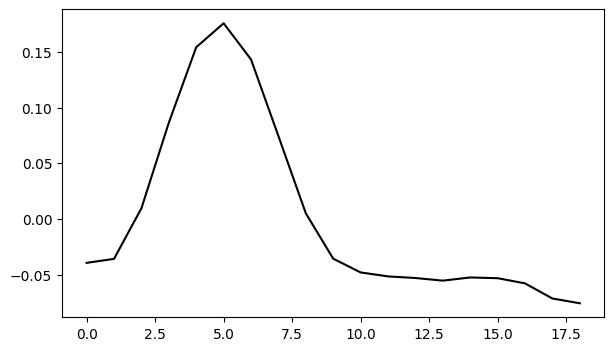

In [33]:
# seu código

df_s0 = df[df.subject == 's0']
df_s0 = df_s0[df_s0.region == 'parietal']
df_s0 = df_s0[df_s0.event == 'stim']

plt.figure(figsize=(7,4))
df_s0=df_s0.sort_values('timepoint')
plt.plot('timepoint', 'signal', data=df_s0, color='k', linestyle='-')

# Q2.

Produza um gráfico como abaixo para o sujeito `s0`. Observe todos os elementos do gráfico como a seleção dos dados (sujeito `s0`, região `parietal` e eventos de `stim` e `cue`), títulos e rótulos.

![imagem](https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/images/ex_matplotlib1_4.png)


**Para o sujeito s0, os valores de repouso (cue) apresentam uma variação menor que a dos estímulos?**

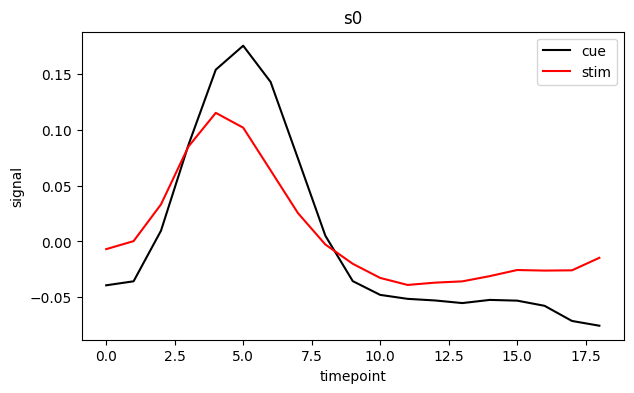

In [34]:
# Seu código
df_s1 = df[df.subject == 's0']
df_s1 = df_s1[df_s1.region == 'parietal']
df_s1 = df_s1[df_s1.event == 'cue']
df_s1 = df_s1.sort_values('timepoint')
plt.figure(figsize=(7,4))
plt.plot('timepoint', 'signal', data=df_s0, color='k', linestyle='-',label = "cue")
plt.plot('timepoint', 'signal', data=df_s1, color='r', linestyle='-',label = "stim")

plt.legend()
plt.title('s0')
plt.xlabel('timepoint')
plt.ylabel('signal')
plt.show()


# Q3. `plt.subplot(nrow, ncol, nr)`

Produza um gráfico como abaixo para os sujeitos `s0` e `s1`, em uma mesma figura empregando o modo `script layer`. Observe todos os demais elementos do gráfico.

![imagem](https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/images/ex_matplotlib1_5.png)

**Para o sujeito s1, os sinais apresentam uma variação menor, aproximadamente igual ou maior com relação ao sujeito s0?**

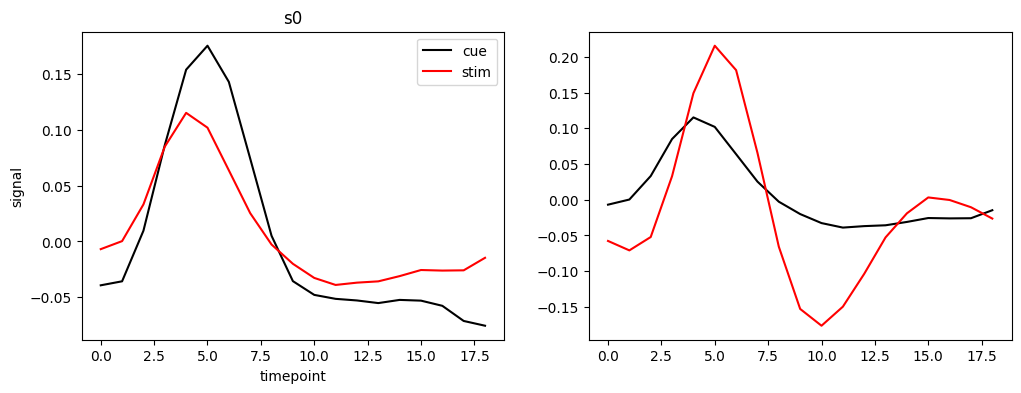

In [35]:
# Seu código
plt.figure(figsize=(12,4)) # cria uma figura alterando o tamanho, figsize=(tamanho_horizontal,tamanho_vertical)
plt.subplot(1, 2, 1) # (linhas, colunas, gráfico ativo)

# Seu código

plt.plot('timepoint', 'signal', data=df_s0, color='k', linestyle='-',label = "cue")
plt.plot('timepoint', 'signal', data=df_s1, color='r', linestyle='-',label = "stim")
plt.subplot(1, 2, 1) # (linhas, colunas, gráfico ativo)

df_s0 = df[df.subject == 's0']
df_s0 = df_s0[df_s0.region == 'parietal']
df_s0 = df_s0[df_s0.event == 'cue']
df_s0 = df_s0.sort_values('timepoint')

df_s1 = df[df.subject == 's1']
df_s1 = df_s1[df_s1.region == 'parietal']
df_s1 = df_s1[df_s1.event == 'cue']
df_s1 = df_s1.sort_values('timepoint')
plt.subplot(1, 2, 2) # (linhas, colunas, gráfico ativo)

plt.plot('timepoint', 'signal', data=df_s0, color='k', linestyle='-',label = "cue")
plt.plot('timepoint', 'signal', data=df_s1, color='r', linestyle='-',label = "stim")
plt.subplot(1, 2, 1) # (linhas, colunas, gráfico ativo)

plt.legend()
plt.title('s0')
plt.xlabel('timepoint')
plt.ylabel('signal')
plt.show()

# Q4. `plt.subplots(nrow,ncol,...)` `ax[i,<j>]`

Produza um gráfico como abaixo para os sujeitos `s0` e `s1`, em uma mesma figura empregando, agora empregando o modo `artist layer`. Observe todos os demais elementos do gráfico.

![imagem](https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/images/ex_matplotlib1_6.png)

**Qual a dimensão do ax criado? (dica: empregue ax.shape)**

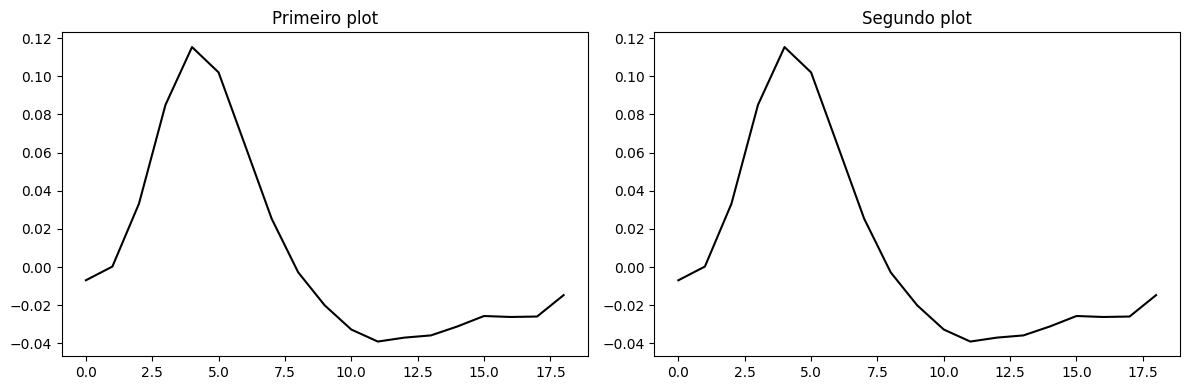

In [36]:
# Seu código

fig, ax = plt.subplots(1,2,figsize=(12,4)) # cria uma figura alterando o tamanho, figsize=(tamanho_horizontal,tamanho_vertical)

# Os comandos podem então ser direcionados para o gráfico específico
ax[0].plot('timepoint', 'signal', data=df_s0, color='k', linestyle='-',label = "cue")
ax[0].set_title('Primeiro plot')

ax[1].plot('timepoint', 'signal', data=df_s0, color='k', linestyle='-',label = "cue")
ax[1].set_title('Segundo plot')

plt.tight_layout()
plt.show()

# Q5. `sharex, sharey`

Produza um gráfico como abaixo agora para os sujeitos `s0` a `s3`, em uma mesma figura empregando empregando o modo `artist layer`. Verifique no comando `subplots()` como compartilhar os eixos. Observe todos os demais elementos do gráfico.

![imagem](https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/images/ex_matplotlib1_7.png)

**Quais sujeitos apresentam sinais mais intensos de estímulos?**

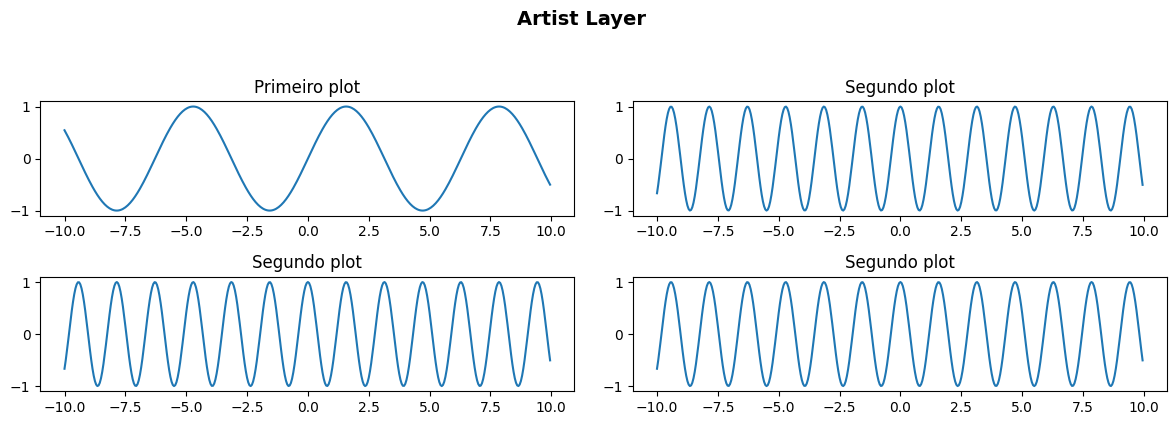

In [37]:
# Cria uma grade de gráficos com 1 linha e 2 colunas de gráficos, ax é um vetor em que cada elemento corresponde a um gráfico da grade
fig, ax = plt.subplots(2,2,figsize=(12,4)) # cria uma figura alterando o tamanho, figsize=(tamanho_horizontal,tamanho_vertical)

plt.suptitle('Artist Layer', fontsize=14, weight='bold', y=1.05)

# Os comandos podem então ser direcionados para o gráfico específico
ax[0,0].plot(x, np.sin(x))
ax[0,0].set_title('Primeiro plot')

ax[0,1].plot(x, np.cos(4*x));
ax[0,1].set_title('Segundo plot')

ax[1,0].plot(x, np.cos(4*x));
ax[1,0].set_title('Segundo plot')

ax[1,1].plot(x, np.cos(4*x));
ax[1,1].set_title('Segundo plot')

plt.tight_layout()
plt.show()